In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
sns.set()

C:\Users\vguru\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


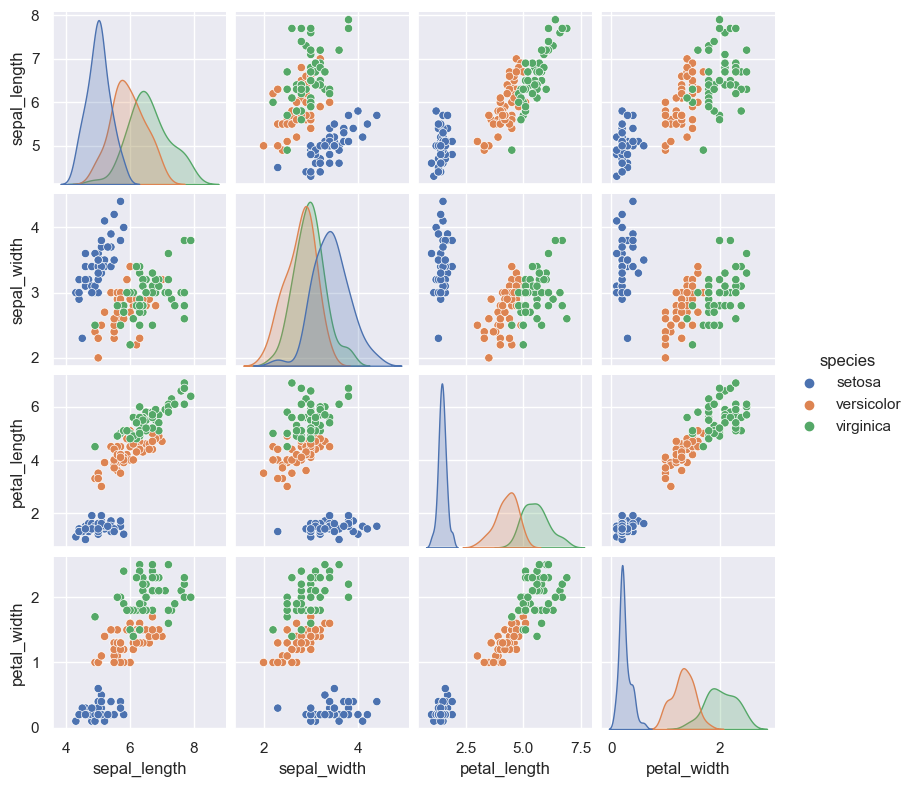

In [4]:
sns.pairplot(iris, hue='species', size=2)

In [5]:
x_iris = iris.drop('species', axis=1)
x_iris.shape

(150, 4)

In [6]:
x_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y_iris = iris['species']
y_iris

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

## Sample on Regression

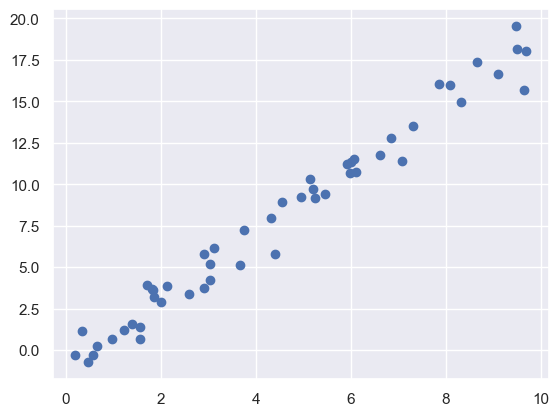

In [8]:
import matplotlib.pyplot as plt
import numpy as np
rng= np.random.RandomState(42)
x= 10 * rng.rand(50)
y= 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression(fit_intercept=True)

In [11]:
model

LinearRegression()

In [12]:
x= x[:, np.newaxis]
x.shape

(50, 1)

In [13]:
# fit the model
model.fit(x, y)

LinearRegression()

In [14]:
model.coef_

array([1.9776566])

In [15]:
model.intercept_

-0.9033107255311146

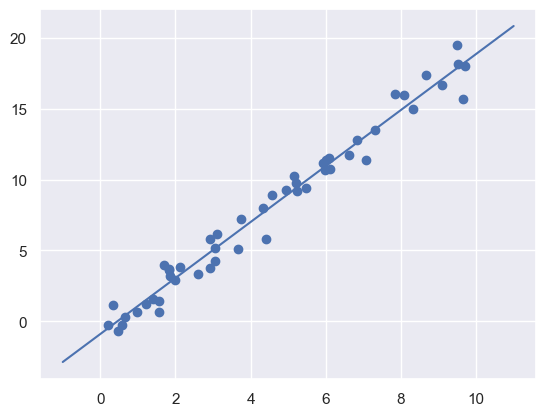

In [16]:
xfit = np.linspace(-1, 11)
xfit= xfit[:, np.newaxis]
yfit = model.predict(xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state=1)

In [18]:
from sklearn.naive_bayes import GaussianNB
mo= GaussianNB()
mo.fit(xtrain, ytrain)

GaussianNB()

In [19]:
y_mod= mo.predict(xtest)

In [20]:
y_mod

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
acc = accuracy_score(ytest, y_mod)

In [23]:
acc

0.9736842105263158

In [24]:
mo.score(xtest, ytest)

0.9736842105263158

## Using PCA for Dimensionality Reduction

C:\Users\vguru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


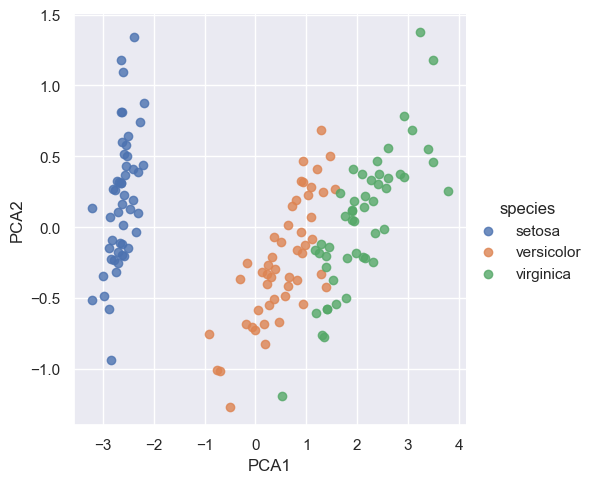

In [25]:
from sklearn.decomposition import PCA
mod = PCA(n_components=2)
mod.fit(x_iris)
x_2d = mod.transform(x_iris)
iris['PCA1'] = x_2d[:, 0]
iris['PCA2'] = x_2d[:, 1]
sns.lmplot('PCA1', 'PCA2', data=iris, hue= 'species', fit_reg=False)
plt.show()

## Using Unsupervised learning(Clustering)

C:\Users\vguru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


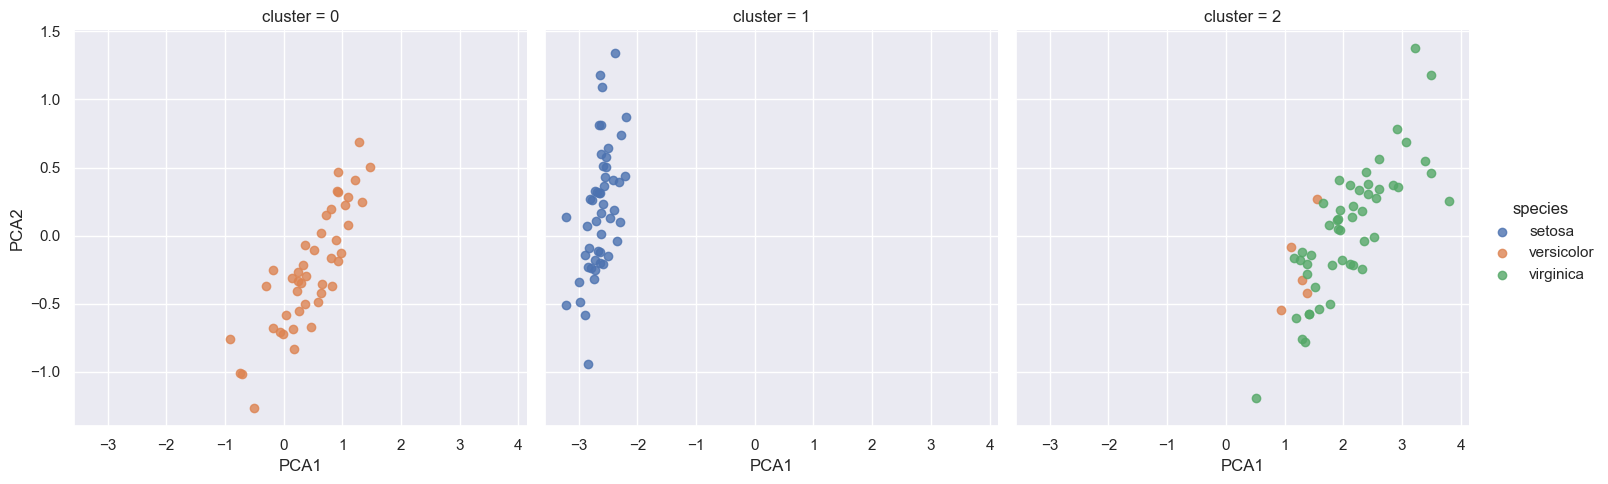

In [26]:
from sklearn.mixture import GaussianMixture as GMM
mod_gmm = GMM(n_components=3, covariance_type='full')
mod_gmm.fit(x_iris)
y_gmm = mod_gmm.predict(x_iris)
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, col='cluster', fit_reg=False)
plt.show()

## Sample on One-hot Encoding

In [27]:
data = [
 {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
 {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
 {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
 {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
 ]

In [28]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False , dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [29]:
vec.get_feature_names()

C:\Users\vguru\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [30]:
data

[{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
 {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
 {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
 {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]

In [31]:
sample = ['problem of evil',
 'evil queen',
 'horizon problem']

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
x= vec.fit_transform(sample)
x

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [33]:
import pandas as pd
pd.DataFrame(x.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
x= vec.fit_transform(sample)
pd.DataFrame(x.toarray(), columns=vec.get_feature_names())

C:\Users\vguru\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


In [35]:
from numpy import nan
x = np.array([[ nan, 0, 3 ],[ 3, 7, 9 ],[ 3, 5, 2 ],[ 4, nan, 6 ],[ 8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
imp = SimpleImputer(strategy='mean')
x2= imp.fit_transform(x)
x2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [38]:
model = LinearRegression().fit(x2, y)
model.predict(x2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [39]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(strategy='mean'), LinearRegression())
model.fit(x,y)
print(y)
print(model.predict(x))

[14 16 -1  8 -5]
[13.14869292 14.3784627  -1.15539732 10.96606197 -5.33782027]


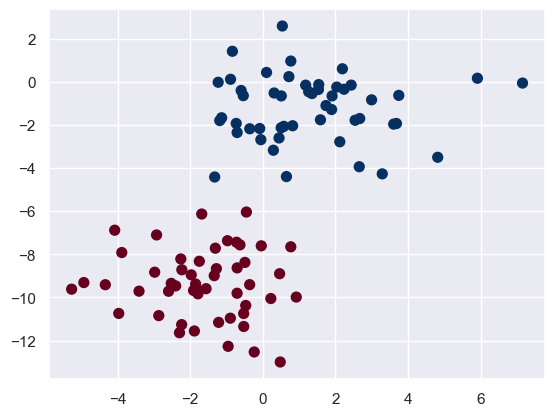

In [40]:
from sklearn.datasets import make_blobs
x, y = make_blobs(100, 2 , centers=2, random_state=2, cluster_std=1.5)
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap='RdBu')
plt.show()

In [41]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x,y)

GaussianNB()

In [42]:
rng = np.random.RandomState(0)
xnew = [-6, -14] + [14, 18] * rng.rand(2000,2)
ynew = model.predict(xnew)

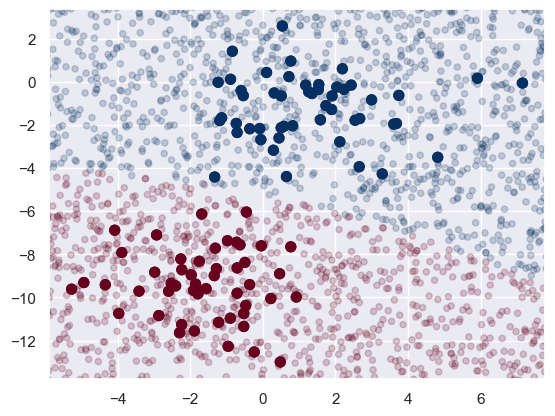

In [44]:
plt.scatter(x[:, 0], x[:, 1], c=y, s= 50, cmap='RdBu')
lim = plt.axis()
plt.scatter(xnew[:,0], xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)
plt.show()

## Sample on Multinomial Naive Bayes

In [46]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [52]:
data.target

array([7, 4, 4, ..., 3, 1, 8])

In [55]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train', categories= categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.

